In [1]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
from matplotlib import gridspec
from excursion_new.learner import Learner
import excursion_new.test_suite.test_functions.fast_1D as testcase_1D
import excursion_new.test_suite.test_functions.fast_2D as testcase_2D
from utils import mgrid, mesh2points, points2mesh, values2mesh

In [2]:

def plot_test(acq, plot_X, train_y, train_X, plot_G, pred_mean, pred_cov, thresholds, next_x, true_y, rangedef, invalid_region, func=None):


    def values2mesh(values, plot_X, plot_rangedef, invalid, invalid_value = np.nan):
        allv = np.zeros(len(plot_X))
        inv  = invalid(plot_X)
        allv[~inv]  = values
        if np.any(inv):
            allv[inv]  = invalid_value
        return allv.reshape(*map(int,plot_rangedef[:,2]))

    true_y = values2mesh(true_y, plot_X, rangedef, invalid_region)
    pred_mean = values2mesh(pred_mean, learner_one.details.plot_X, learner_one.details.plot_rangedef, learner_one.details.invalid_region)

    fig = plt.figure(figsize=(15,5))
    gs = fig.add_gridspec(1, 2)
    fig_ax1 = fig.add_subplot(gs[0,:1])
    fig_ax2 = fig.add_subplot(gs[0,1:])

    xv, yv= plot_G


    line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')

    min_xv = np.min(pred_mean)
    max_xv = np.max(pred_mean)
    line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
    color_axis = fig_ax1.contourf(xv, yv, pred_mean, np.linspace(min_xv, max_xv, 100))

    ##train points
    old_points = fig_ax1.scatter(
        train_X[:, 0],
        train_X[:, 1],
        s=20,
        edgecolor="white",
        label="Observed Truth Values",
    )


    if next_x is not None:
        new_point = fig_ax1.scatter(
            next_x[:, 0],
            next_x[:, 1],
            s=20,
            c="r",
            label="New Observed Value",
        )

    fig_ax1.set_xlabel("x")
    fig_ax1.set_ylabel("y")
    fig_ax1.set_xlim(*rangedef[0][:2])
    fig_ax1.set_ylim(*rangedef[1][:2])
    fig.colorbar(color_axis, ax=fig_ax1)
    fig_ax1.legend(loc=0)
    l1, _ = line1.legend_elements()
    l2, _ = line2.legend_elements()

    fig_ax1.legend(
        [l1[0], l2[0], old_points, new_point],
        ["True excursion set (thresholds=0)", "Estimation", "Observed points", "Next point"],
        #loc="bottom center",
        bbox_to_anchor=(1.10, -0.1),
        ncol=2,
        facecolor="grey",
        framealpha=0.20,
    )

    if acq is not None:
        #        ax1.set_xticks([], [])
        #fig_ax2.set_xticks([])
        # eliminate -inf
        max_xv_ = np.max(acq)
        min_xv_ = np.min(acq)
        acq = values2mesh(acq, plot_X, rangedef, invalid_region)
        color_axis_ = fig_ax2.contourf(xv, yv, acq, np.linspace(min_xv_, max_xv_, 100))
        #plot truth
        line_ = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
        # plot
                ##train points
        old_points_ = fig_ax2.scatter(
            train_X[:, 0],
            train_X[:, 1],
            s=20,
            edgecolor="white",
            label="Observed Truth Values",
        )


        if next_x is not None:
            new_point_ = fig_ax2.scatter(
                next_x[:, 0],
                next_x[:, 1],
                s=20,
                c="r",
                label="New Observed Value",
            )

        fig_ax2.set_xlabel("x")
        fig_ax2.set_ylabel("y")
        fig_ax2.set_xlim(*rangedef[0][:2])
        fig_ax2.set_ylim(*rangedef[1][:2])
        fig.colorbar(color_axis_, ax=fig_ax2)
        fig_ax2.legend(loc=0)
        l_, _ = line_.legend_elements()

        fig_ax2.legend(
            [l_[0], old_points_, new_point_],
            ["True excursion set (thresholds=0)", "Acquisition Value", "Observed points", "Next point"],
            #loc="bottom center",
            bbox_to_anchor=(1.10, -0.1),
            ncol=2,
            facecolor="grey",
            framealpha=0.20,
        )
        fig_ax2.legend(loc="lower right")

    plt.show()

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\numpy\lib\index_tricks.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/3573714786.py:23: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, t

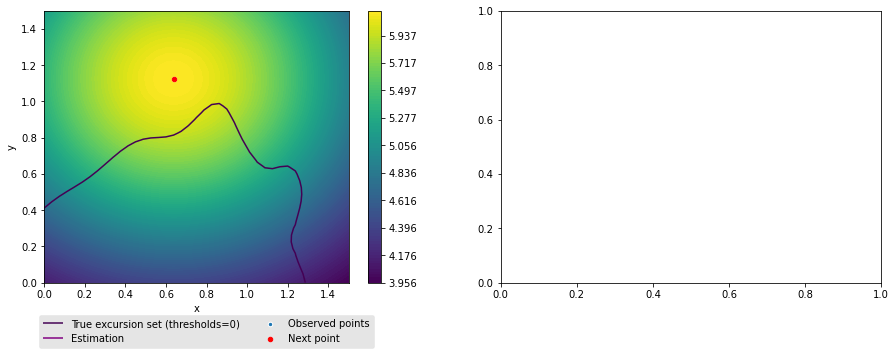

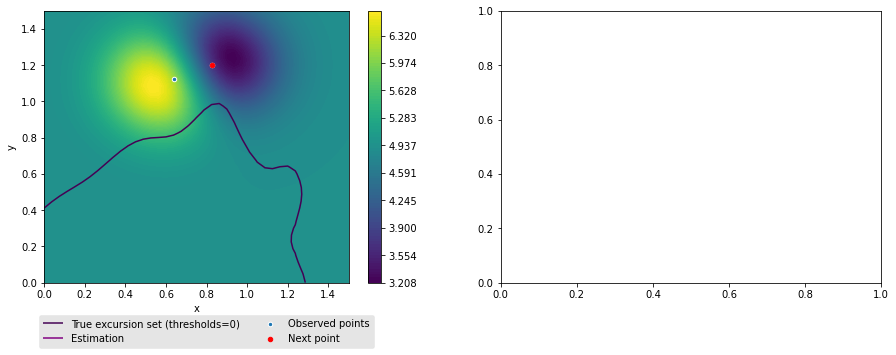

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/3573714786.py:77: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line_ = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')


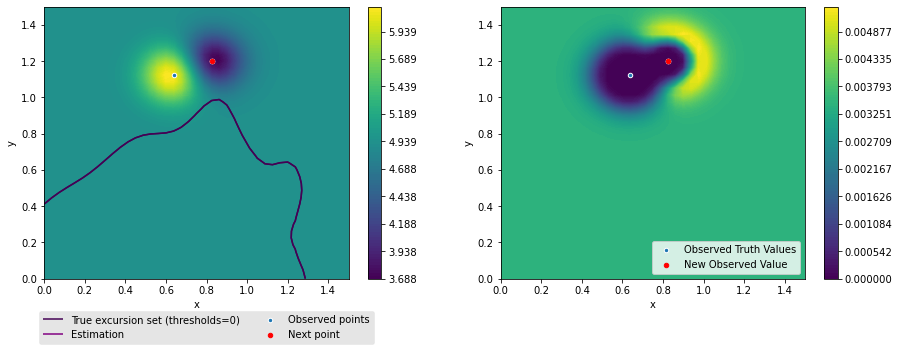

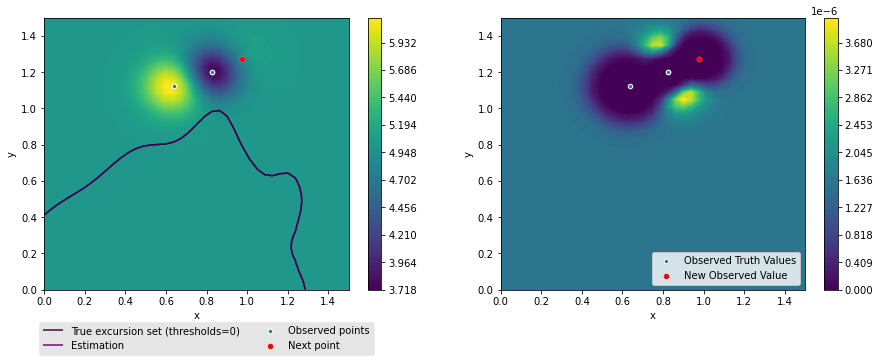

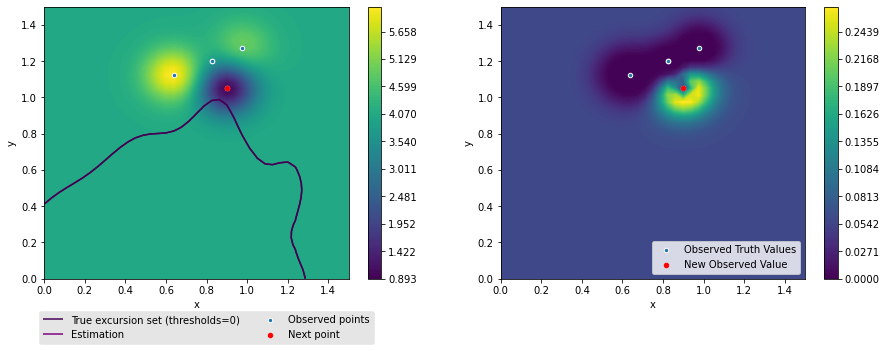

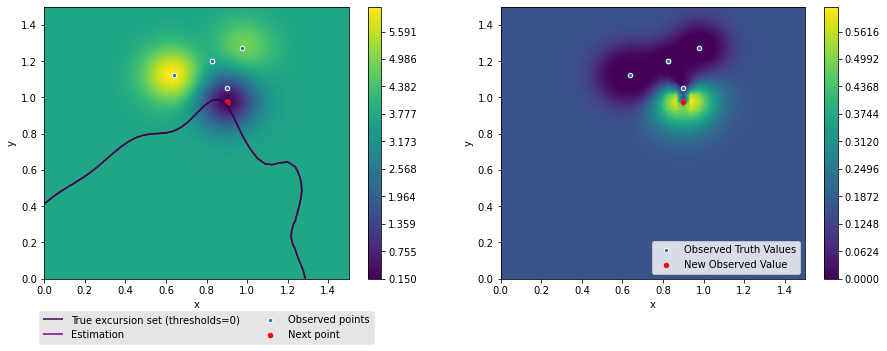

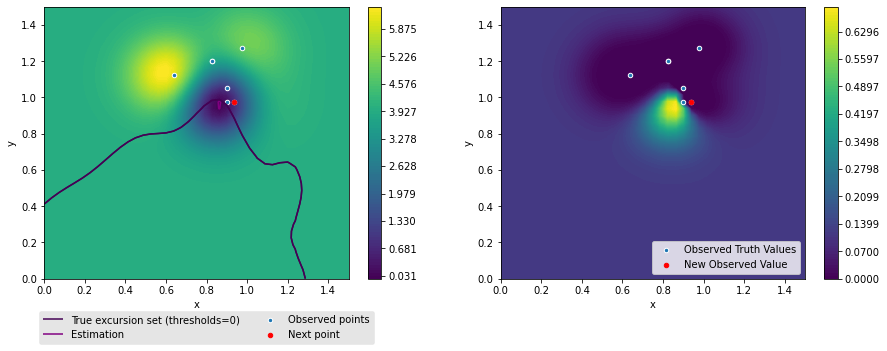

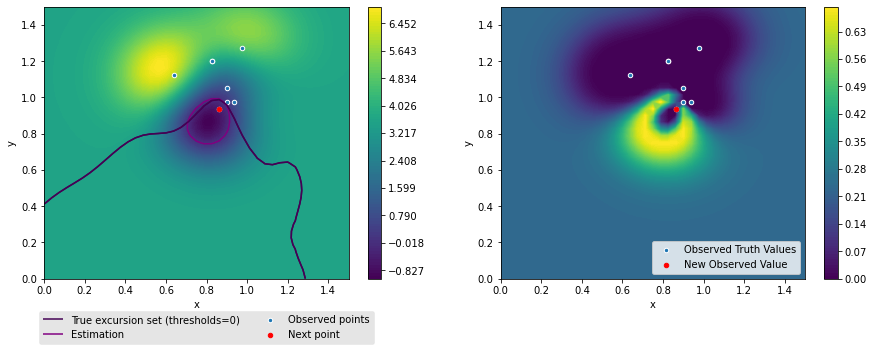

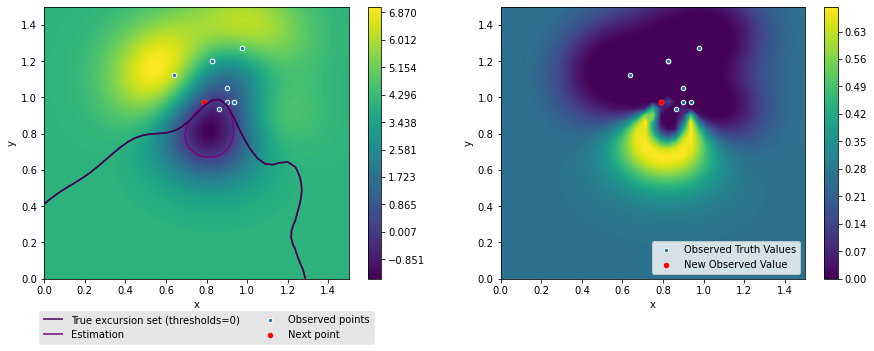

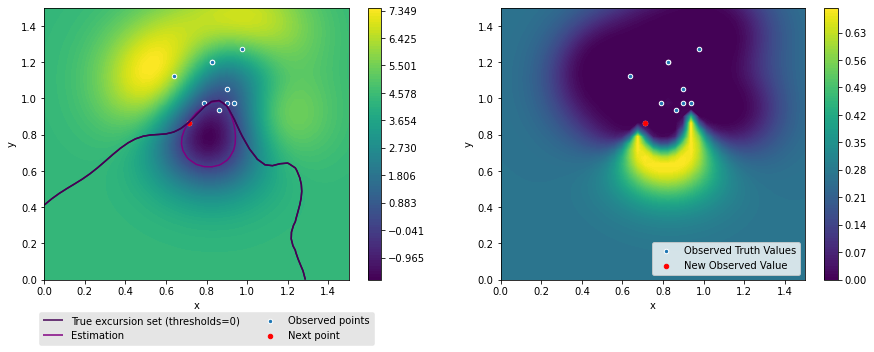

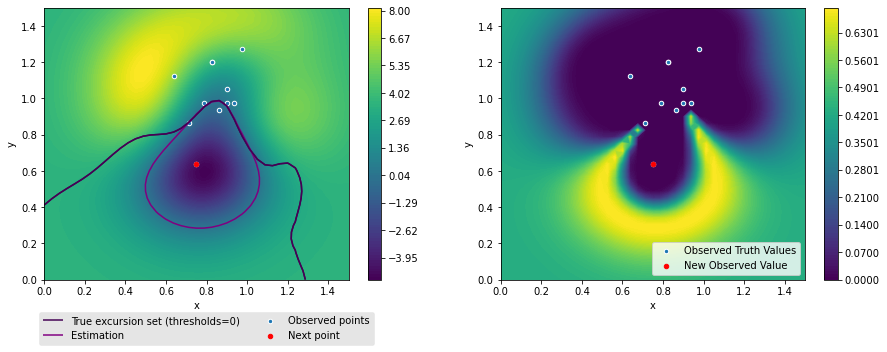

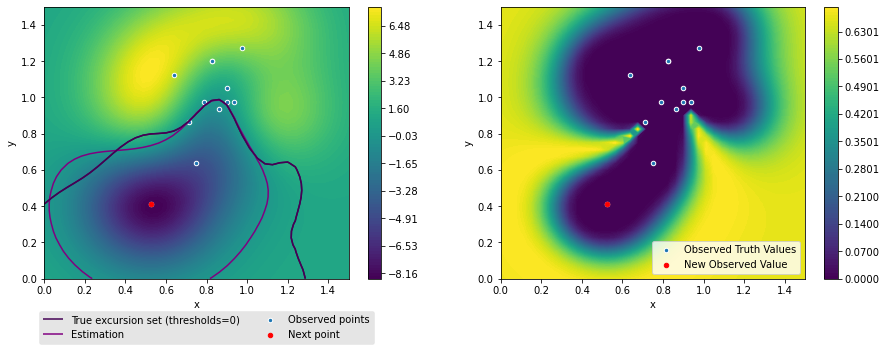

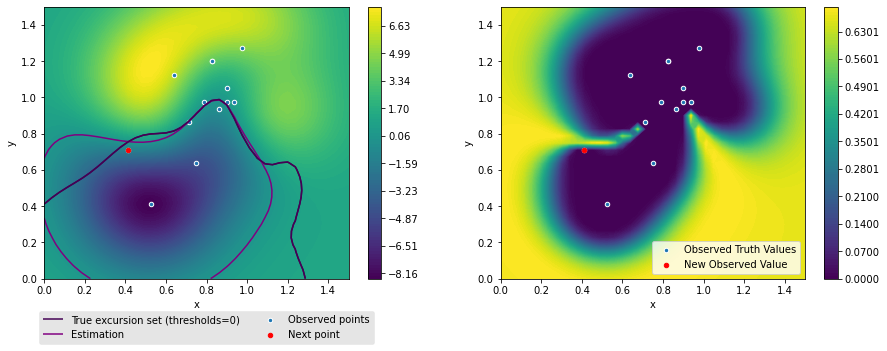

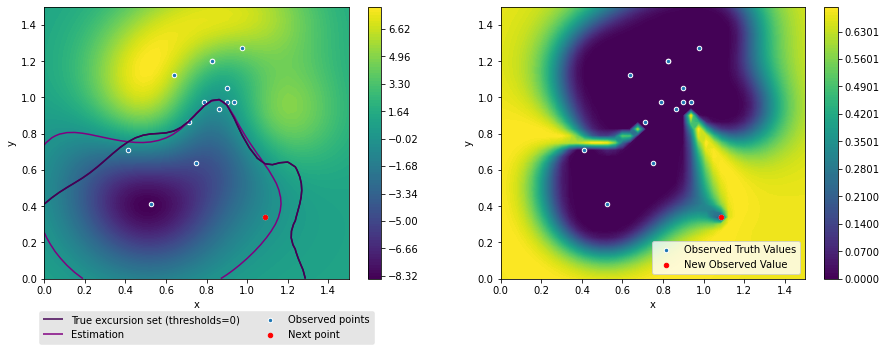

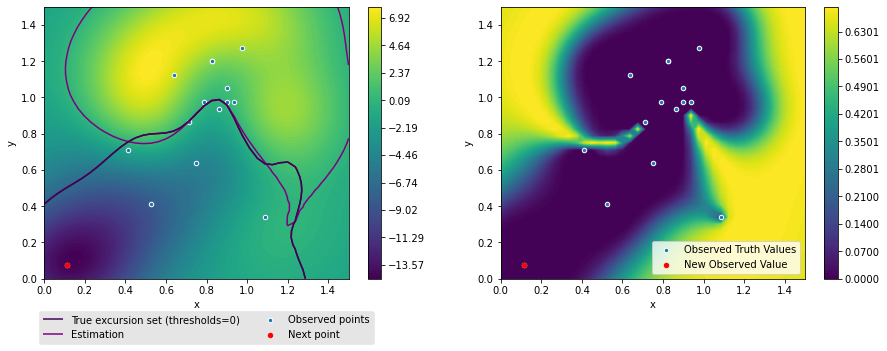

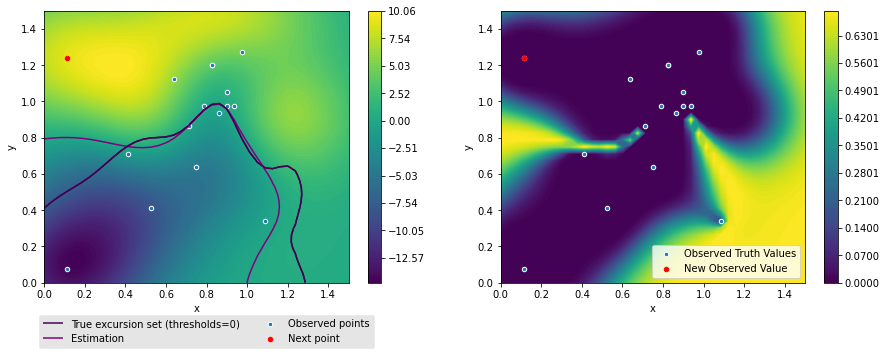

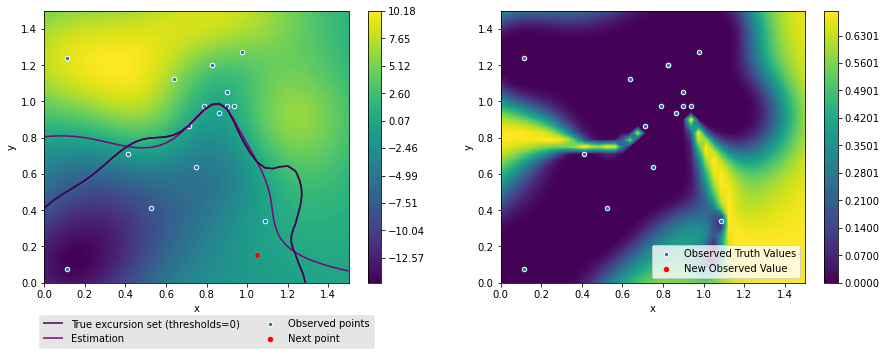

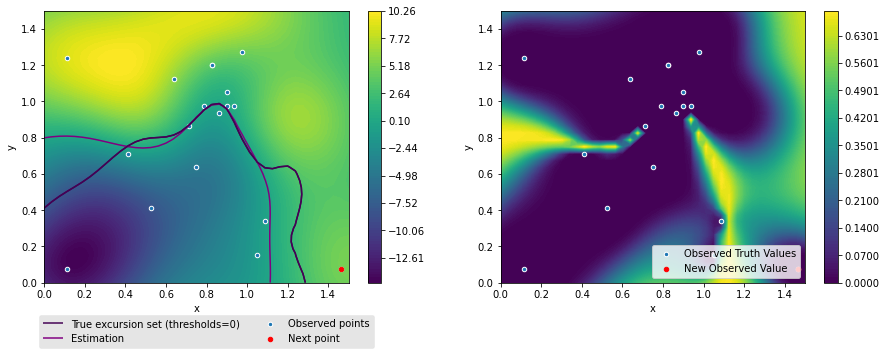

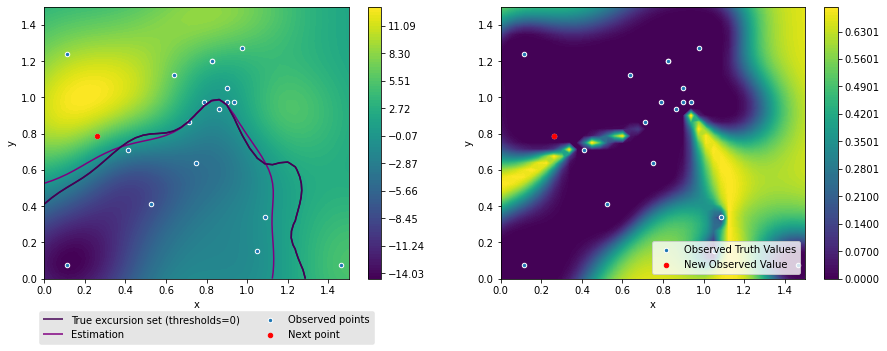

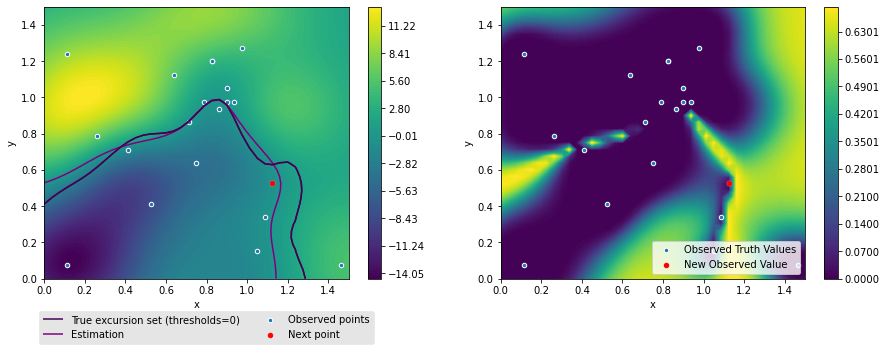

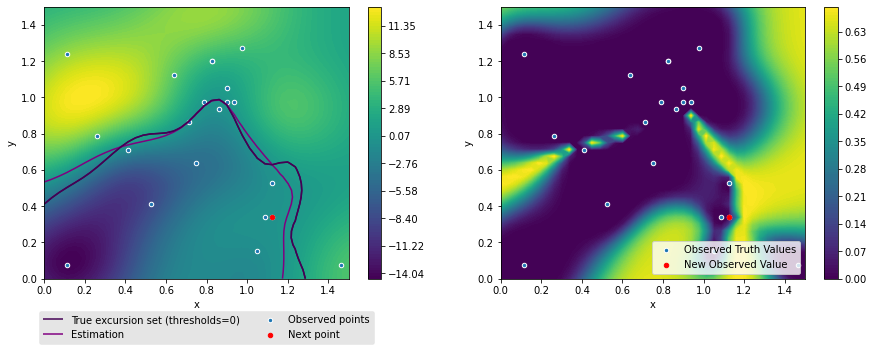

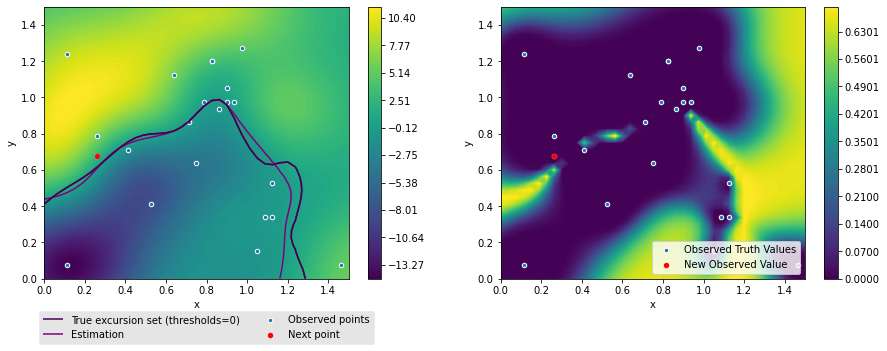

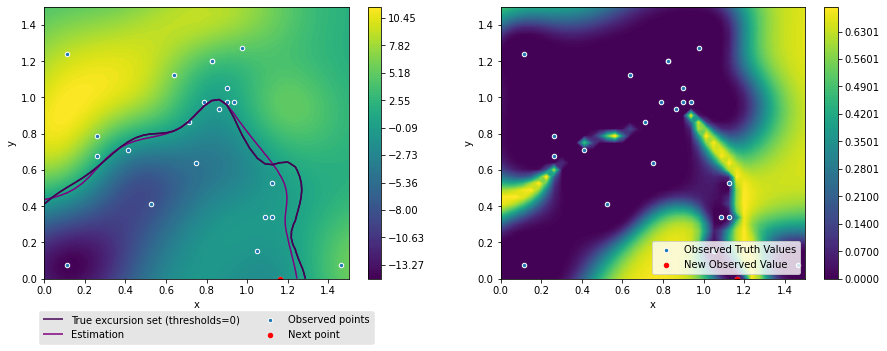

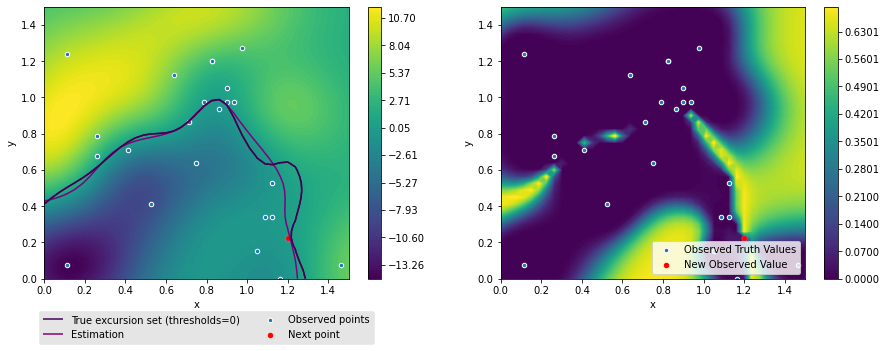

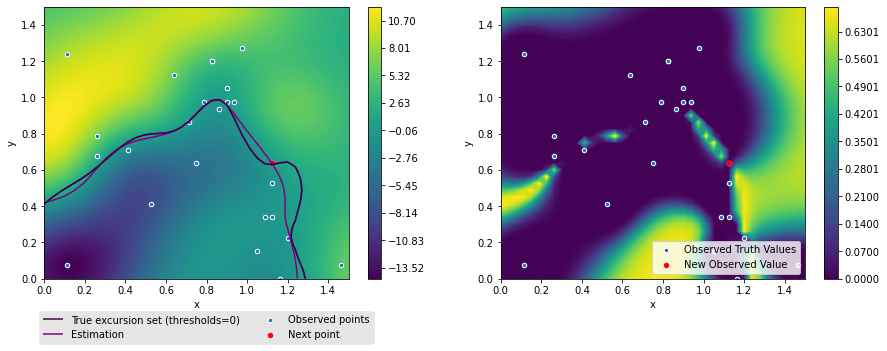

15.125


In [3]:
learner_one = Learner(testcase_2D)
learner_one.initialize()

start = time.process_time()

for iteration in range(25):
    x_one = learner_one.suggest()
    result = learner_one.evaluate_and_tell(x_one)
    model = result.gp
    X_train = model.train_inputs[0].cpu().detach().numpy()
    y_train = model.train_targets.cpu().detach().numpy()
    plot_X = torch.from_numpy(result.plot_X).to(device=torch.device('cuda'), dtype=torch.float64)
    likelihood = result.gp.likelihood
    likelihood.eval()
    model.eval()
    prediction = likelihood(model(plot_X))
    variance = prediction.variance.cpu().detach().numpy()
    mean = prediction.mean.cpu().detach().numpy()
    true_y = result.func(plot_X).cpu().detach().numpy()
    acq = result.aqc
    if acq is not None:
        acq = result.aqc.cpu().detach().numpy()
    next_x = result.next_x
    if next_x is not None:
        next_x = next_x.cpu().detach().numpy()
    plot_test(acq, learner_one.details.plot_X, y_train, X_train, learner_one.details.plot_G, mean, variance, [0.0], next_x, true_y, learner_one.details.plot_rangedef, learner_one.details.invalid_region)

end = time.process_time() - start
print(end)


In [4]:

xv, yv = learner_one.details.plot_G

In [5]:
true_y

array([-17.00890746, -15.6631643 , -14.24442644, ...,   7.15103022,
         7.27216164,   7.36229036])

In [6]:

def plot_test(acq, gps, train_y, train_X, plot_G, pred_mean, pred_cov, thresholds, next_x, true_y, func=None):
    fig = plt.figure(figsize=(15,15))
    gs = fig.add_gridspec(2, 1, height_ratios=[10, 5])
    fig_ax1 = fig.add_subplot(gs[0,:])
    fig_ax2 = fig.add_subplot(gs[1,:])
    plot_X = plot_G[0]

    fig_ax1.plot(plot_X, true_y, linestyle="dashed", color='k', label='True Function')

    min_X = np.min(plot_X)
    max_X = np.max(plot_X)
    fig_ax1.hlines(thresholds, min_X, max_X, colors="purple", label="threshold")

    ##train points
    fig_ax1.plot(
        train_X,
        train_y,
        "k*",
        color="black",
        label="samples",
        markersize=10,
    )
    for x in train_X:
        fig_ax1.axvline(x, alpha=0.2, color="grey")

    if next_x:
        fig_ax1.axvline(next_x, c="red", label="new evaluation")
    fig_ax1.plot(plot_X, pred_mean, color="blue", label="mean")

    ##variance
    for i in range(1, 6):
        fig_ax1.fill_between(
            plot_X,
            pred_mean + 1*i * pred_cov ** 0.5,
            pred_mean - 1*i * pred_cov ** 0.5,
            color="darkslateblue",
            alpha=0.6 / i,
            label=str(i) + "sigma",
        )

    fig_ax1.set_xlabel("x")
    fig_ax1.set_ylabel("f(x)")
    fig_ax1.set_ylim(-6, 20)
    # ax0.legend(loc="upper right")

    if acq is not None:
        #        ax1.set_xticks([], [])
        fig_ax2.set_xticks([])
        # eliminate -inf
        mask = np.isfinite(acq)
        acq = acq[mask]
        X_plot = plot_X[mask]
        # plot
        fig_ax2.plot(X_plot, acq, color="orange", label="MES")
        # + str(acq_type))
        fig_ax2.set_xlabel("x")
        fig_ax2.set_ylabel("acq(x)")
        # if acq_type == "MES":
        fig_ax2.set_yscale("log")
        fig_ax2.axvline(next_x, c="red")

        # ax1.legend(vertical, label="maximum")

        fig_ax2.legend(loc="lower right")
    plt.show()

C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


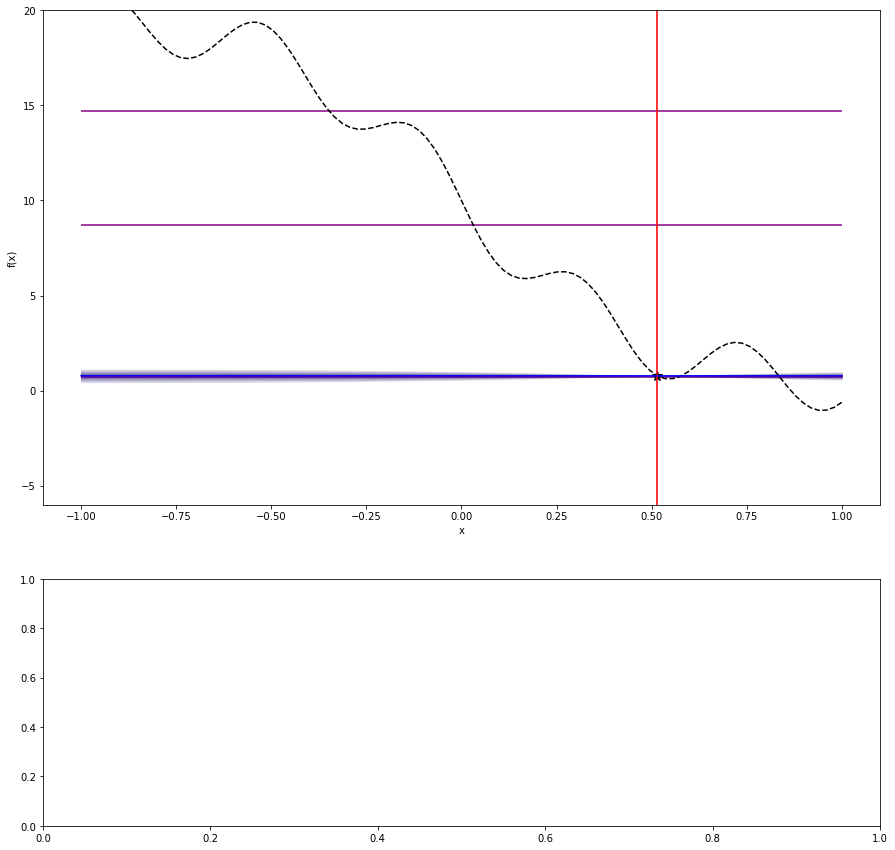

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


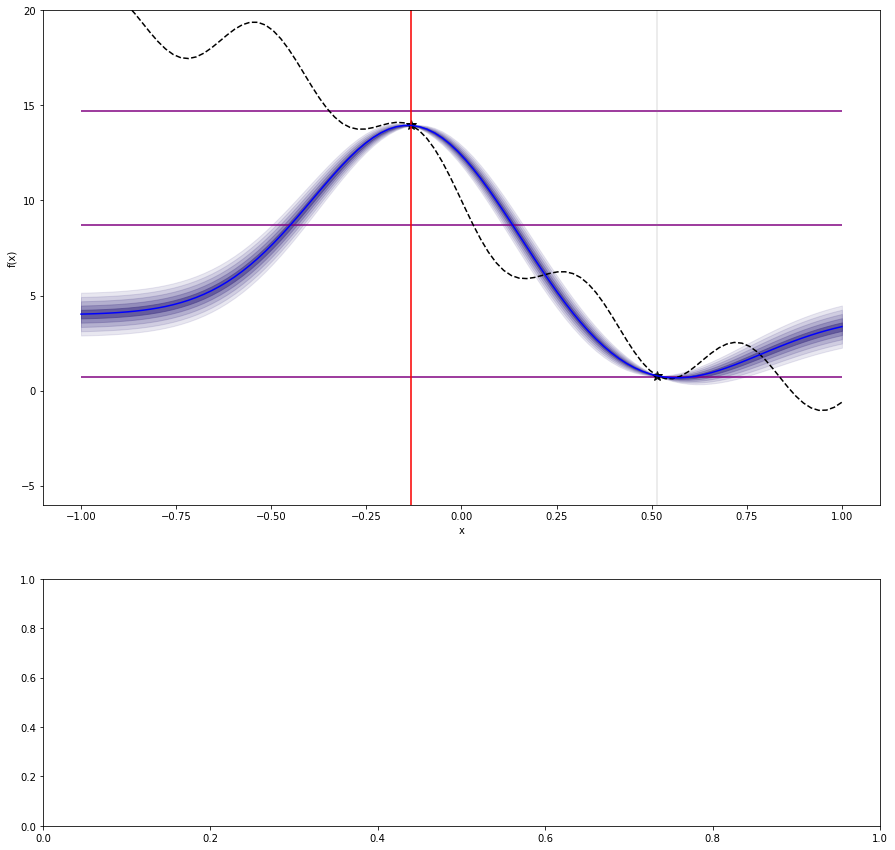

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


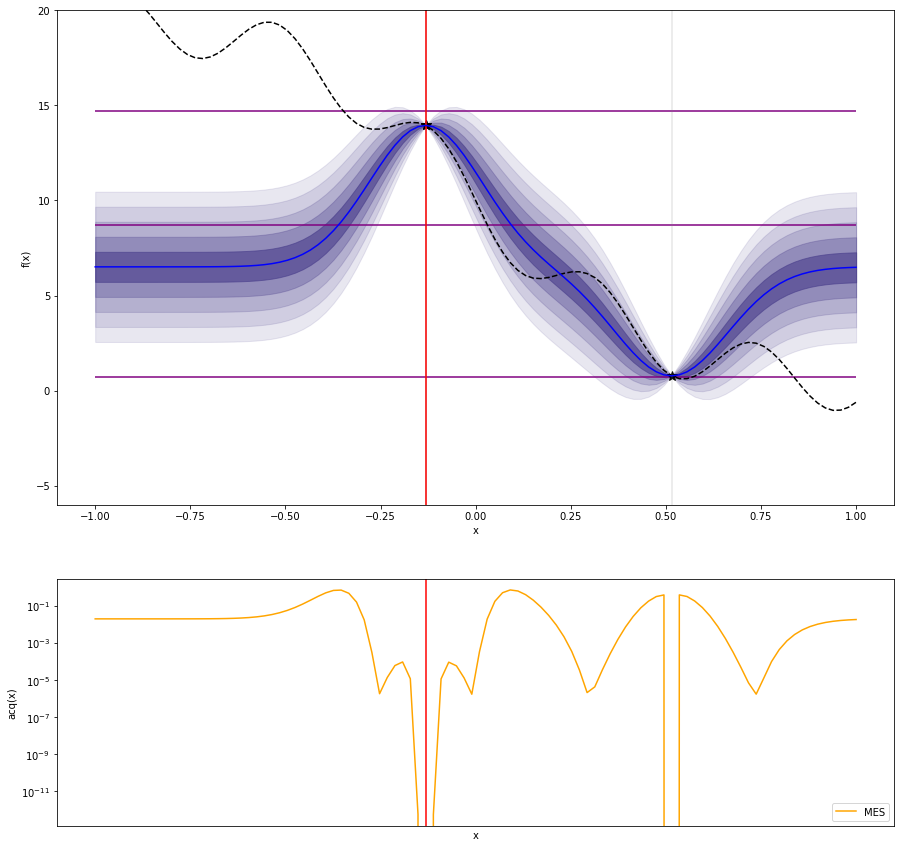

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


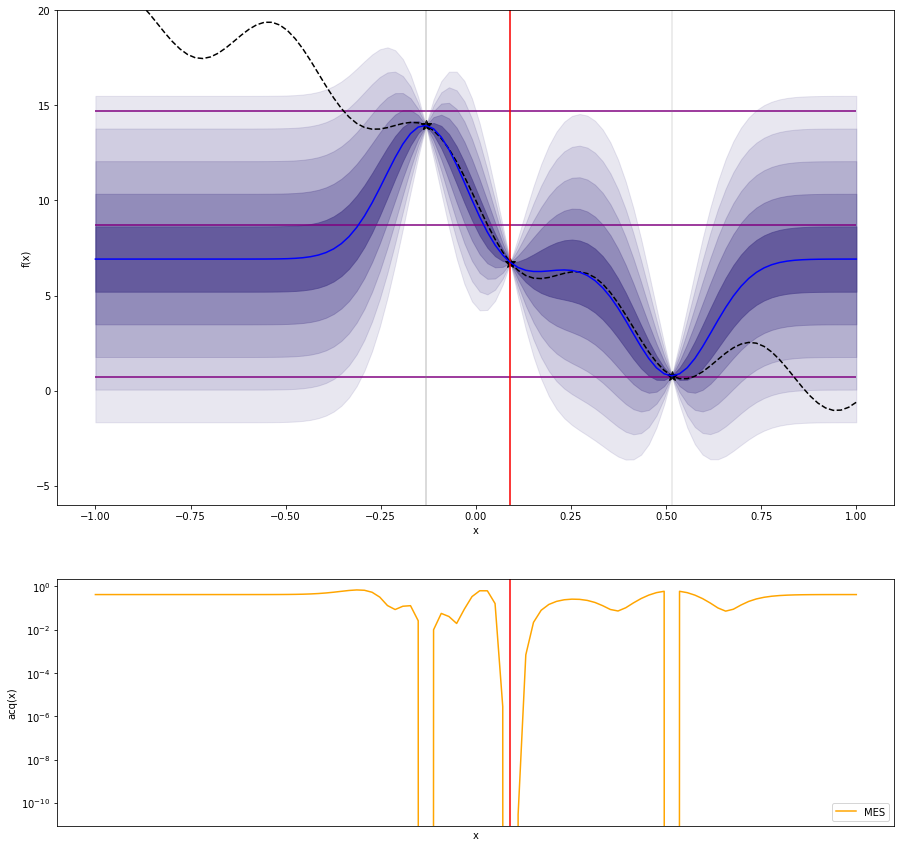

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

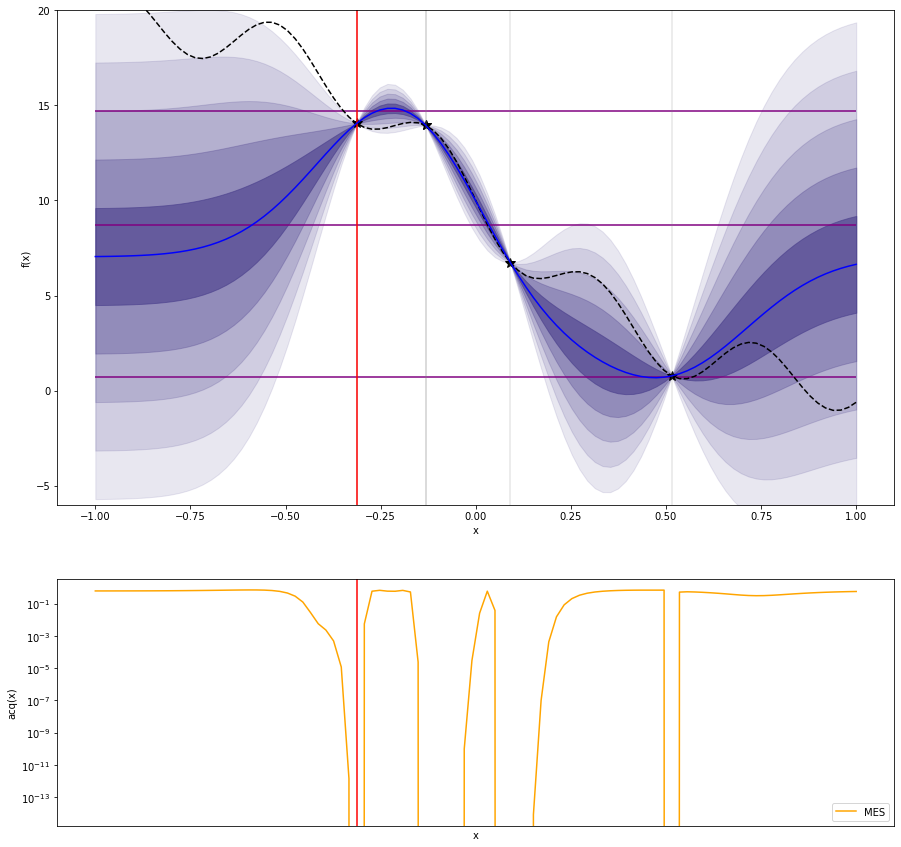

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


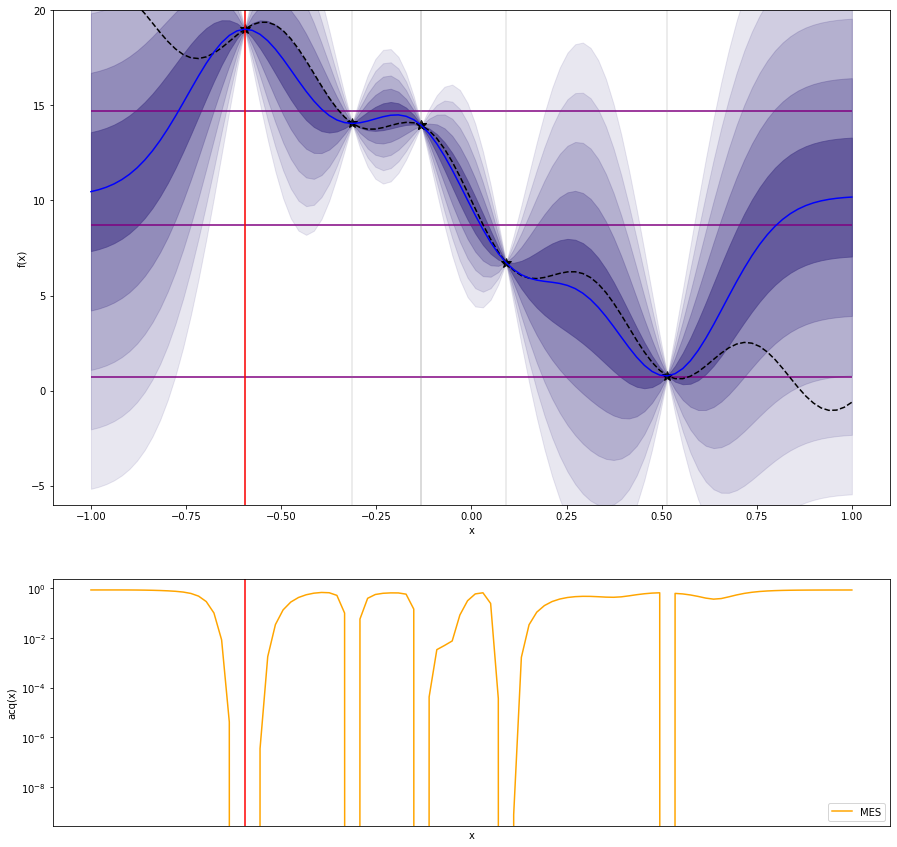

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


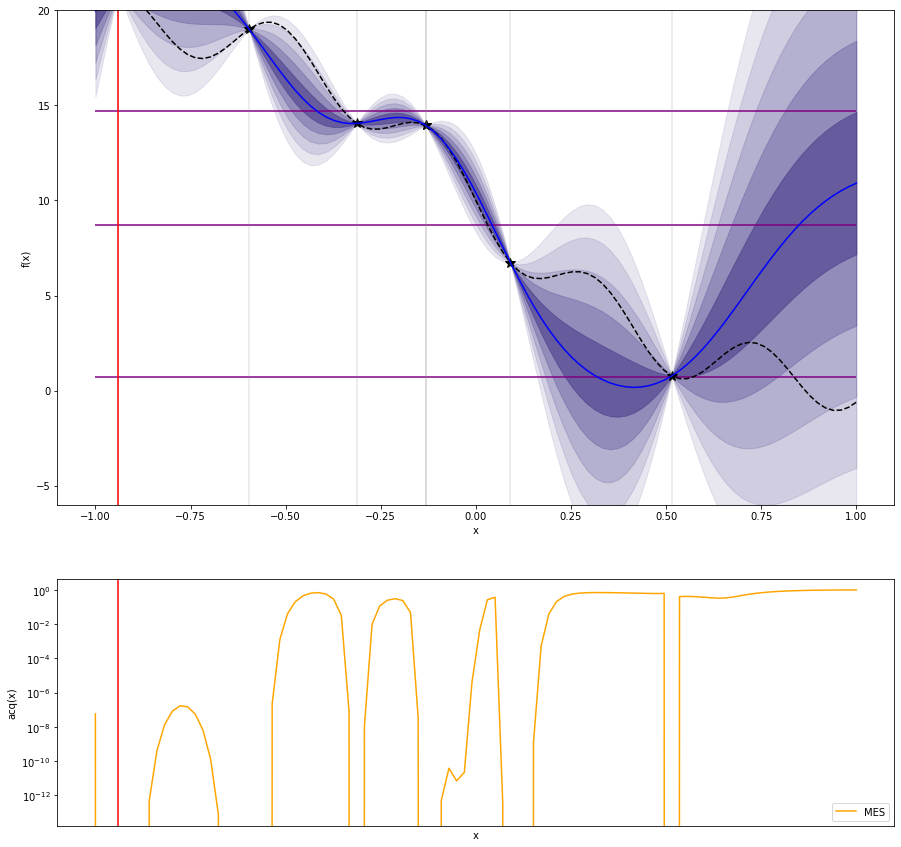

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

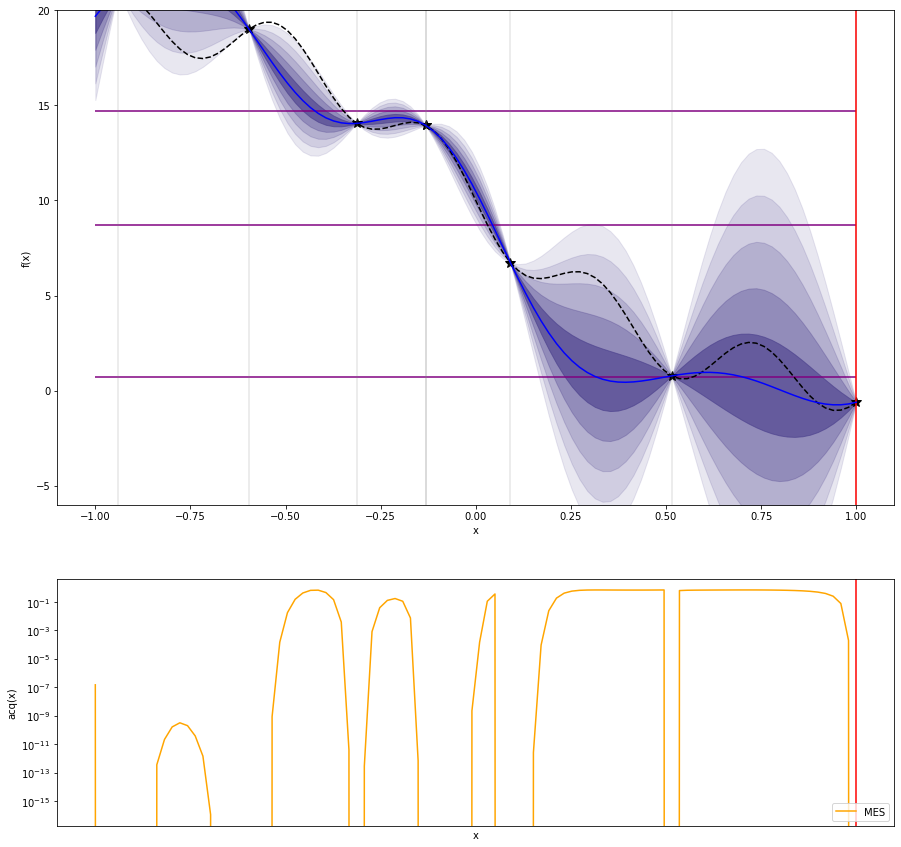

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

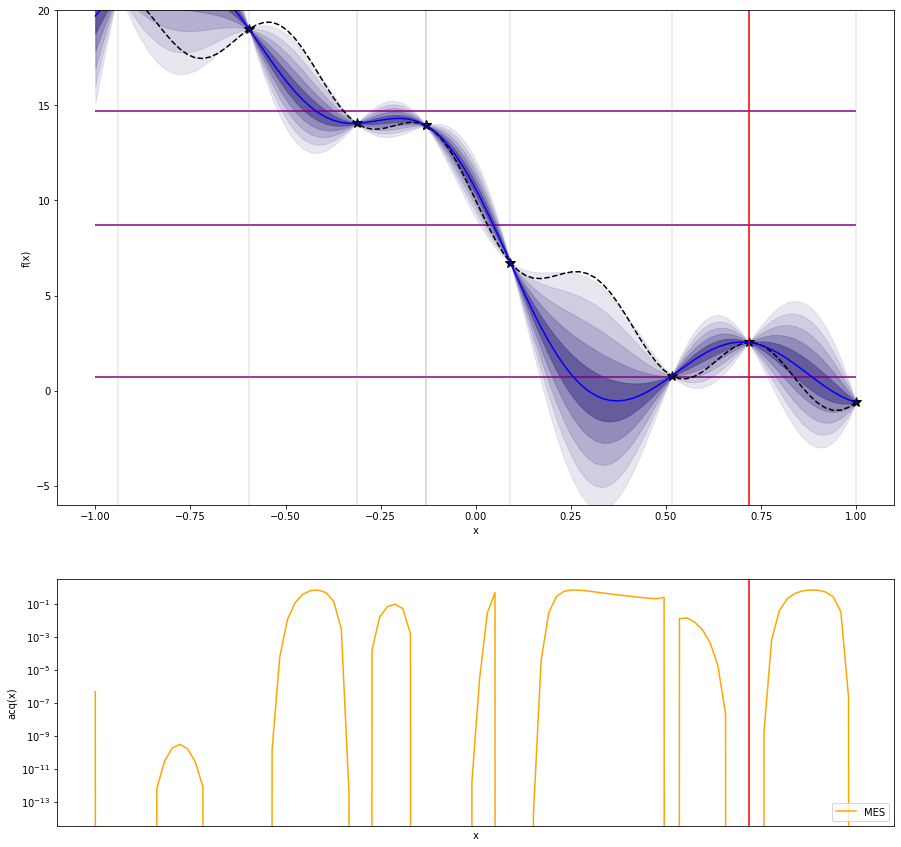

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

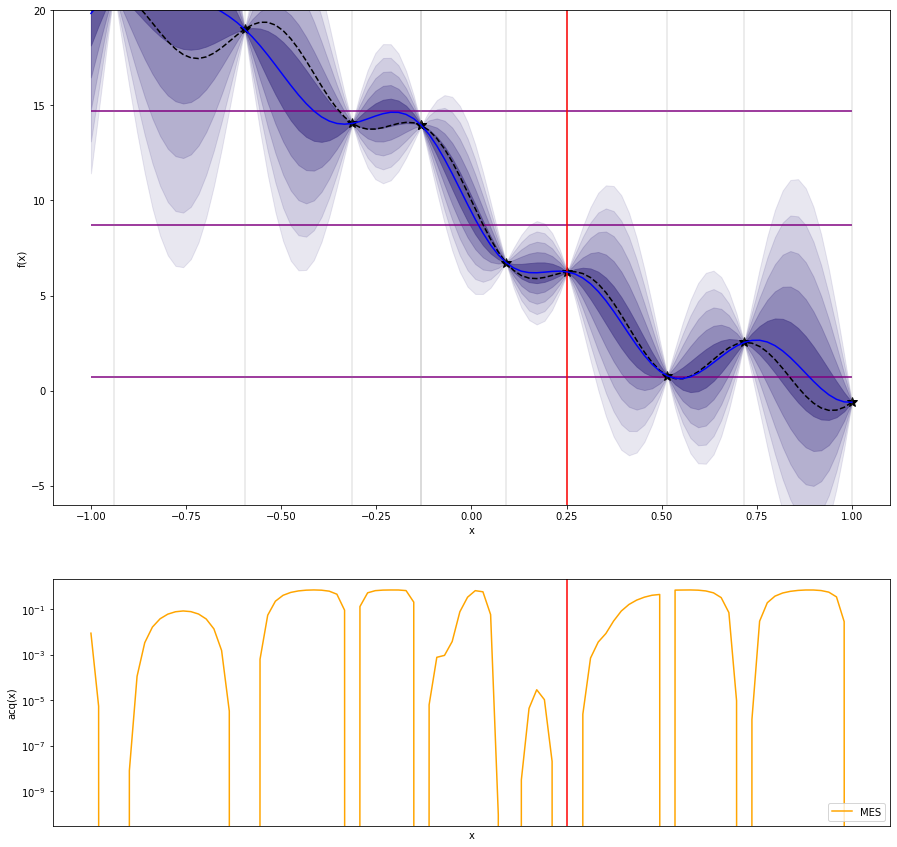

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


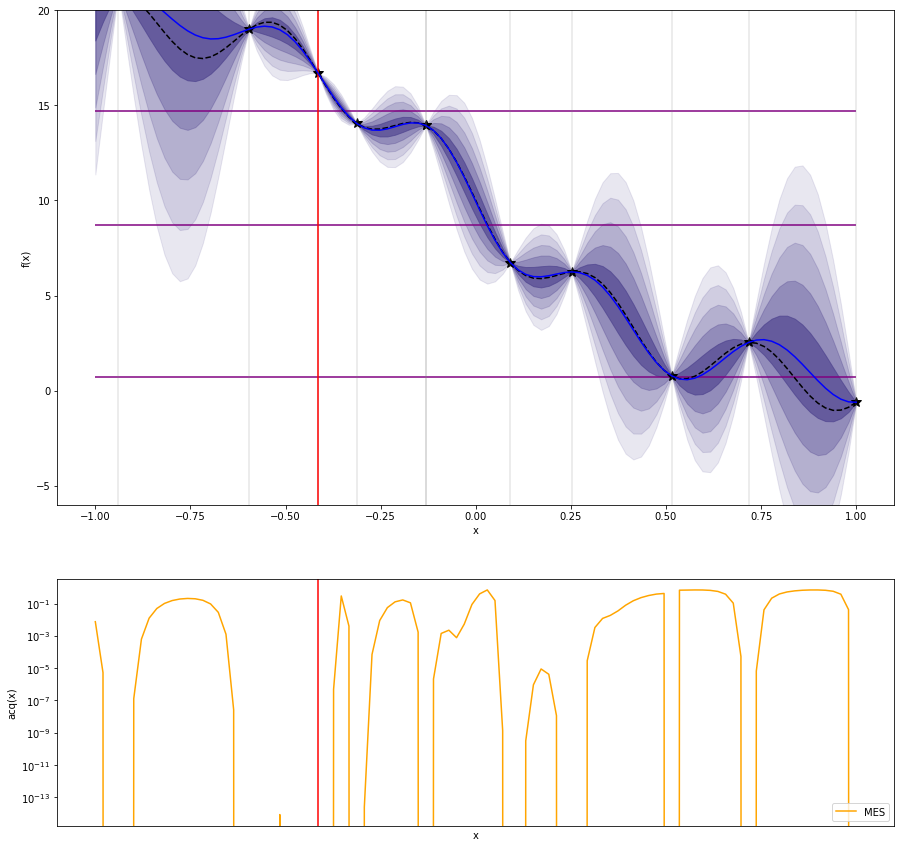

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


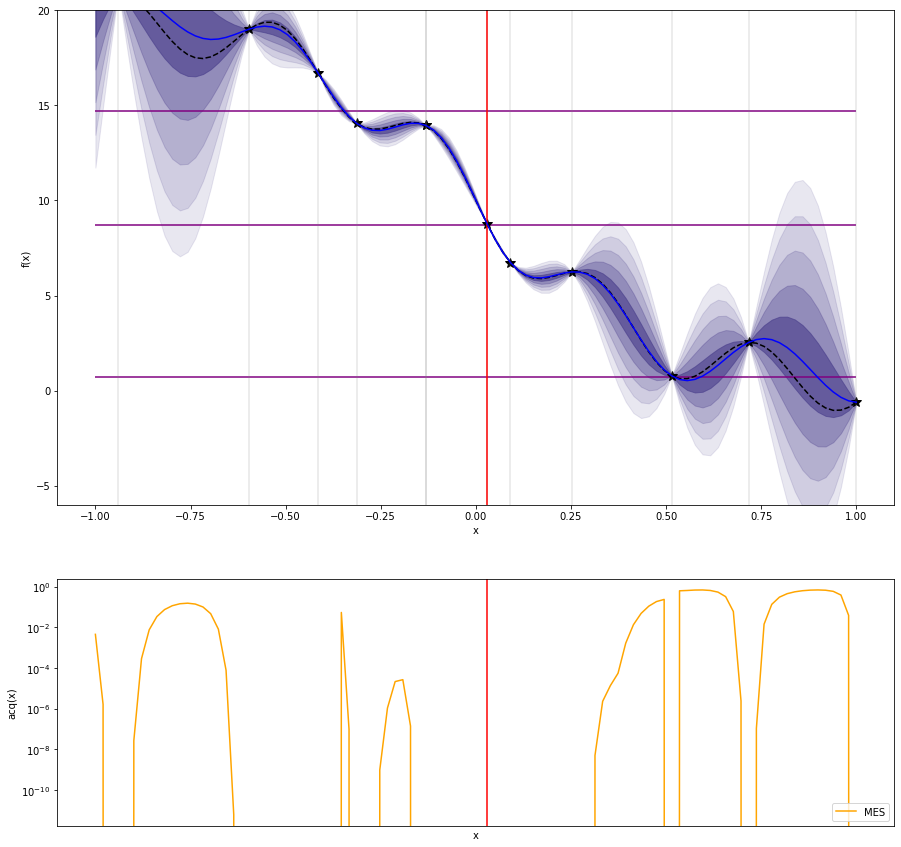

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


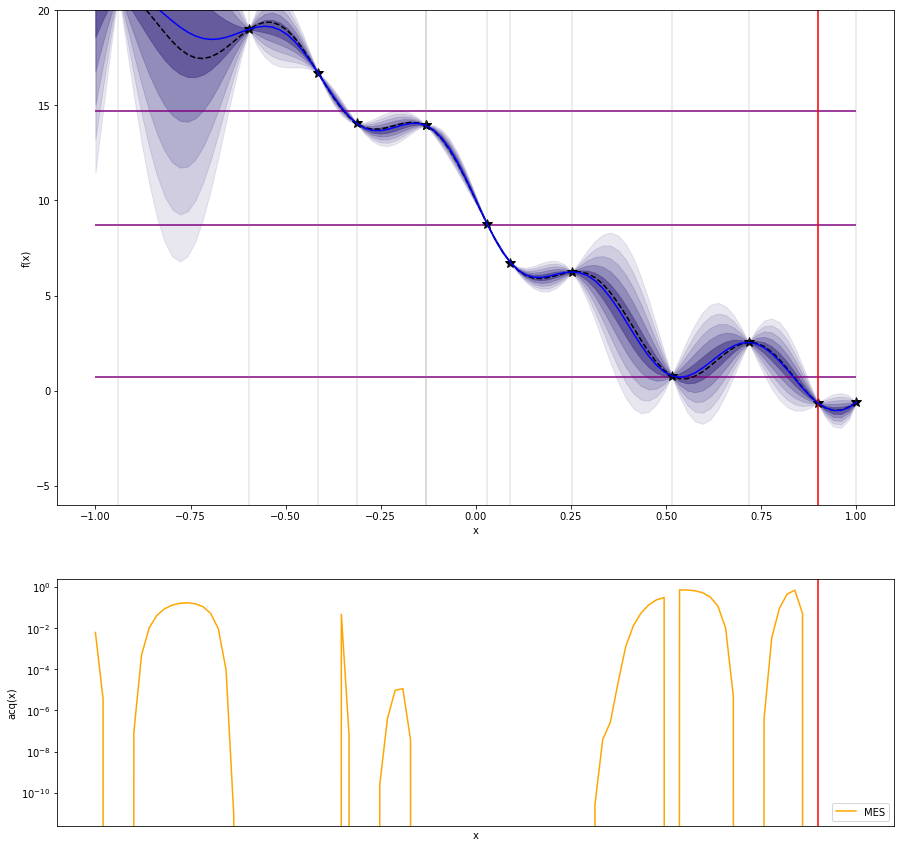

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

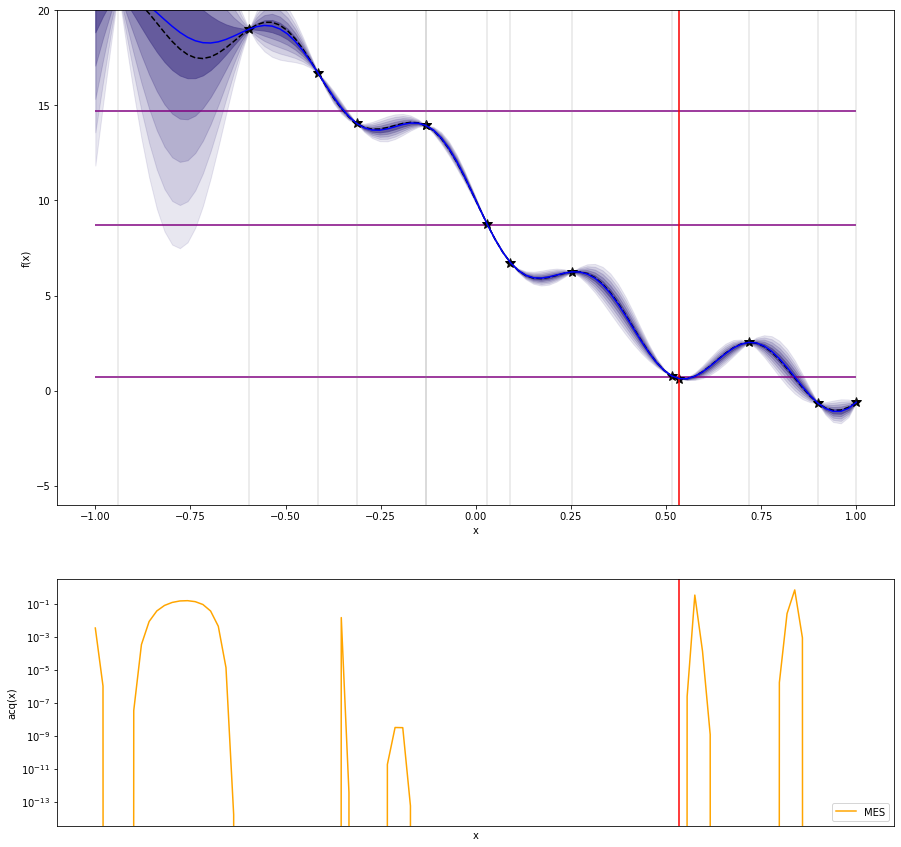

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

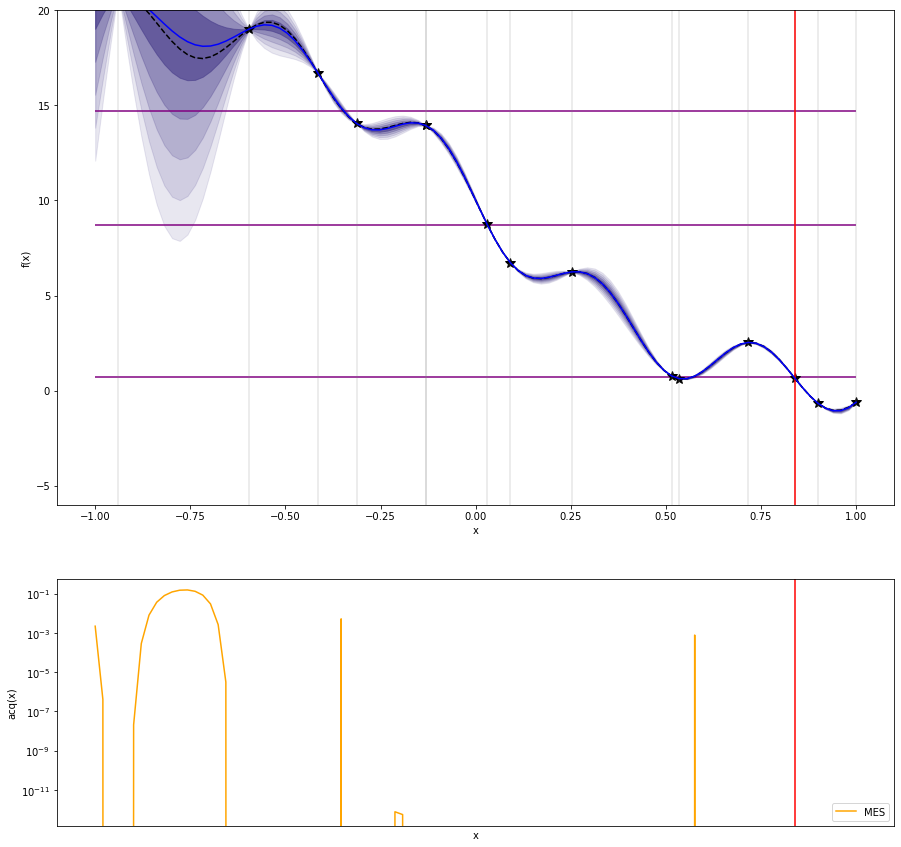

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


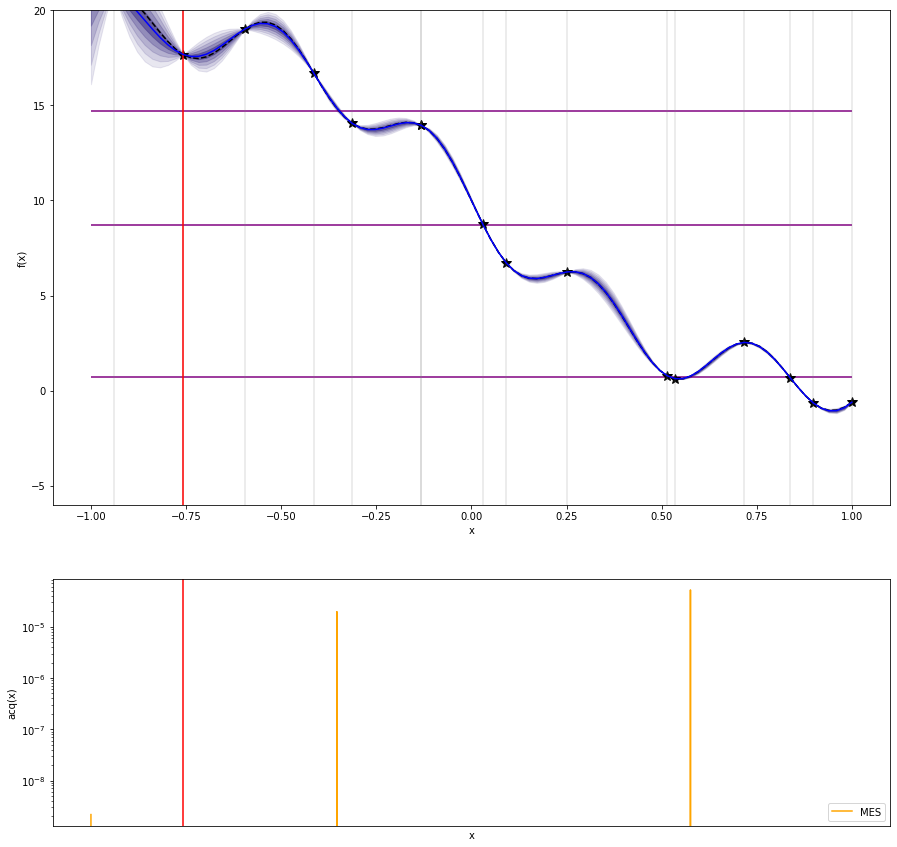

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

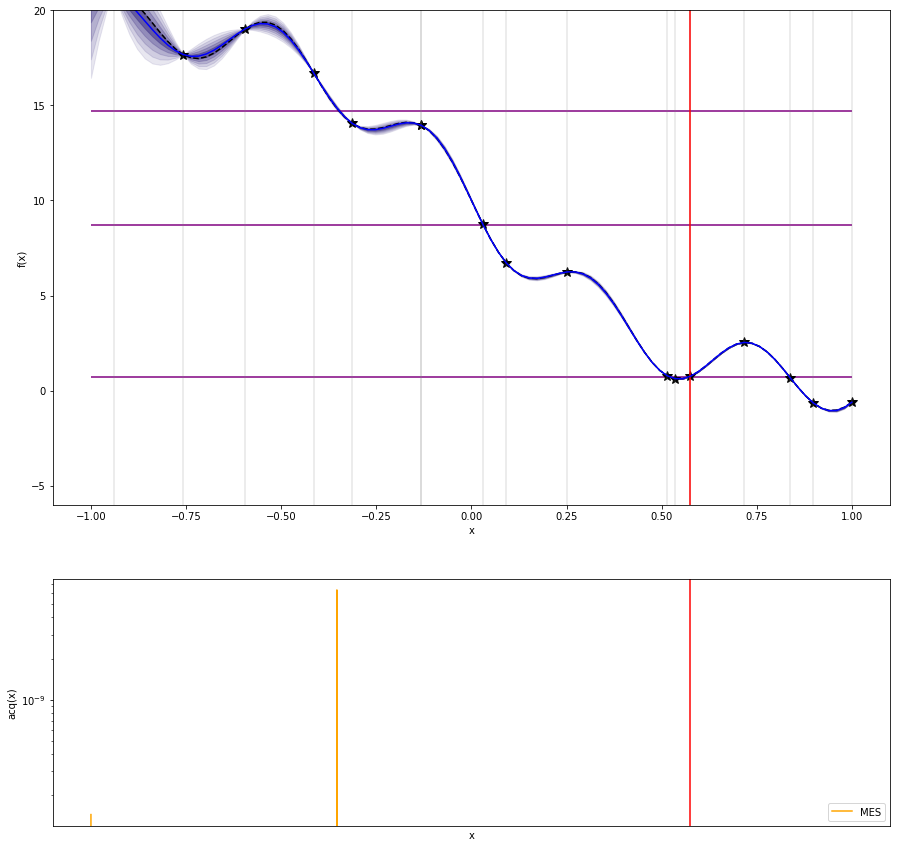

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

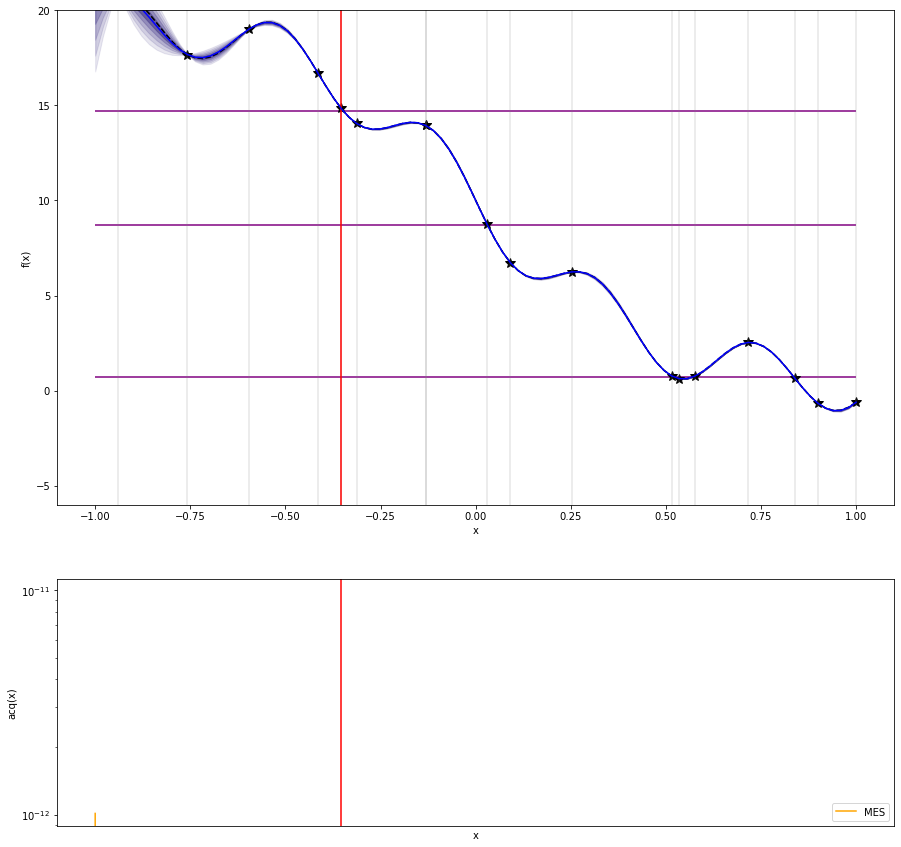

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

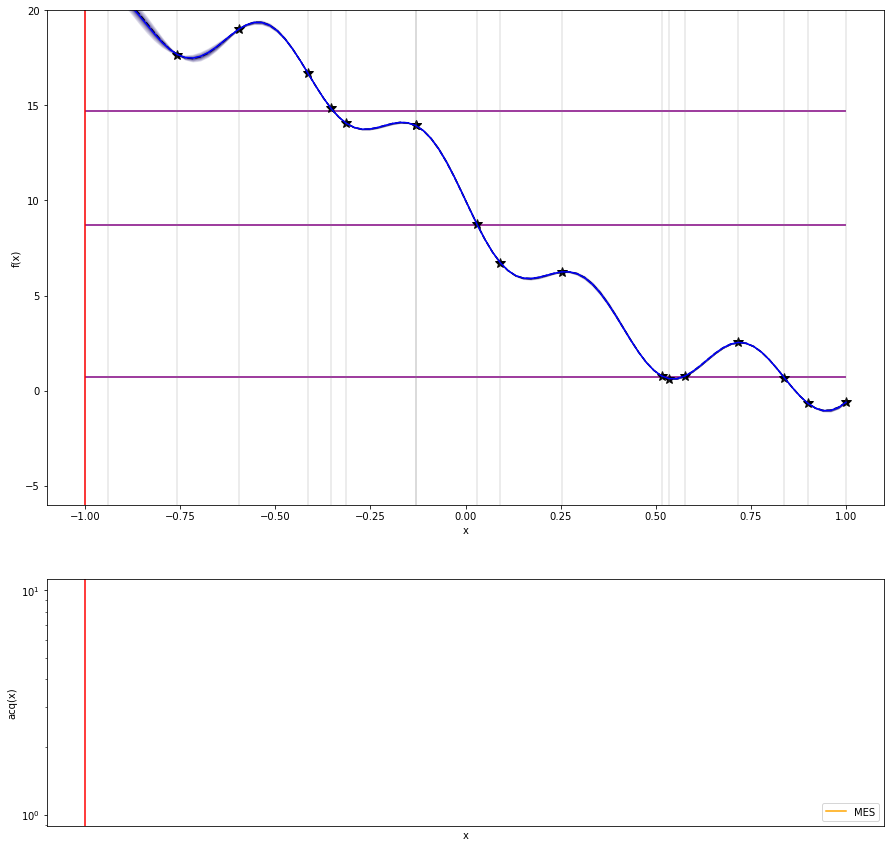

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

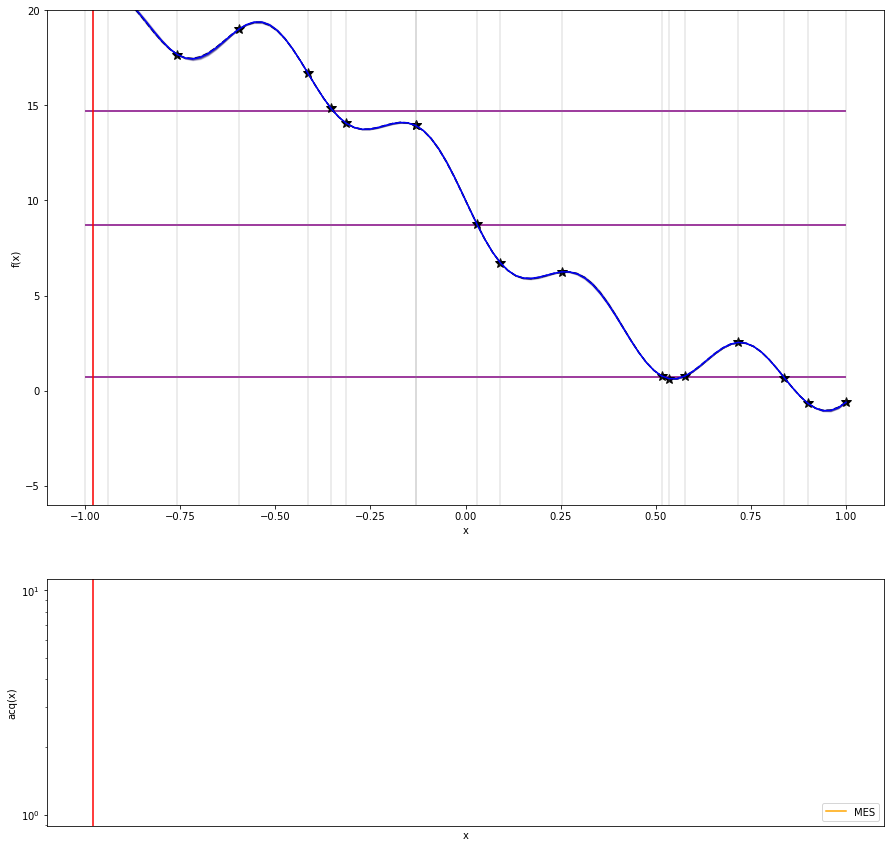

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

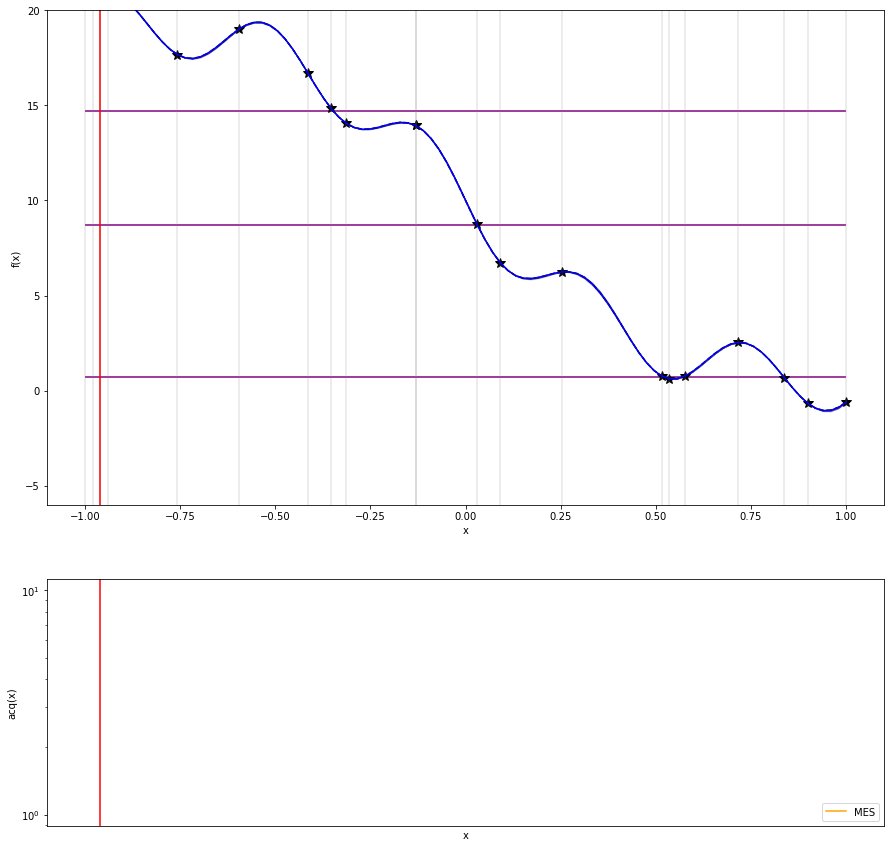

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig_ax2.set_yscale("

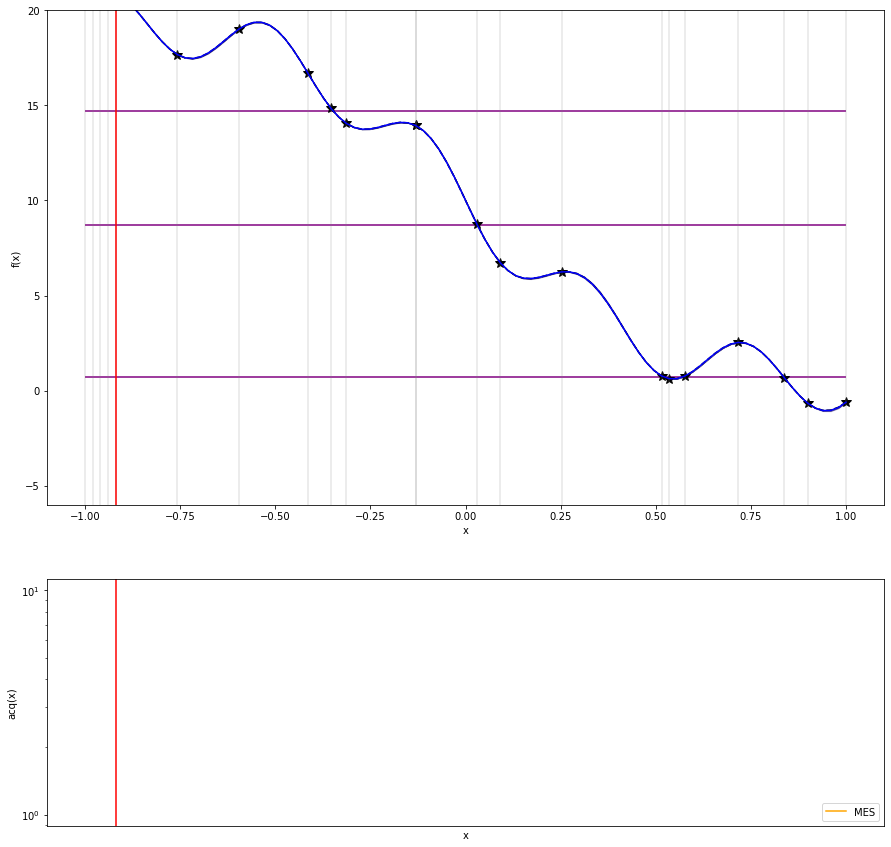

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword arg

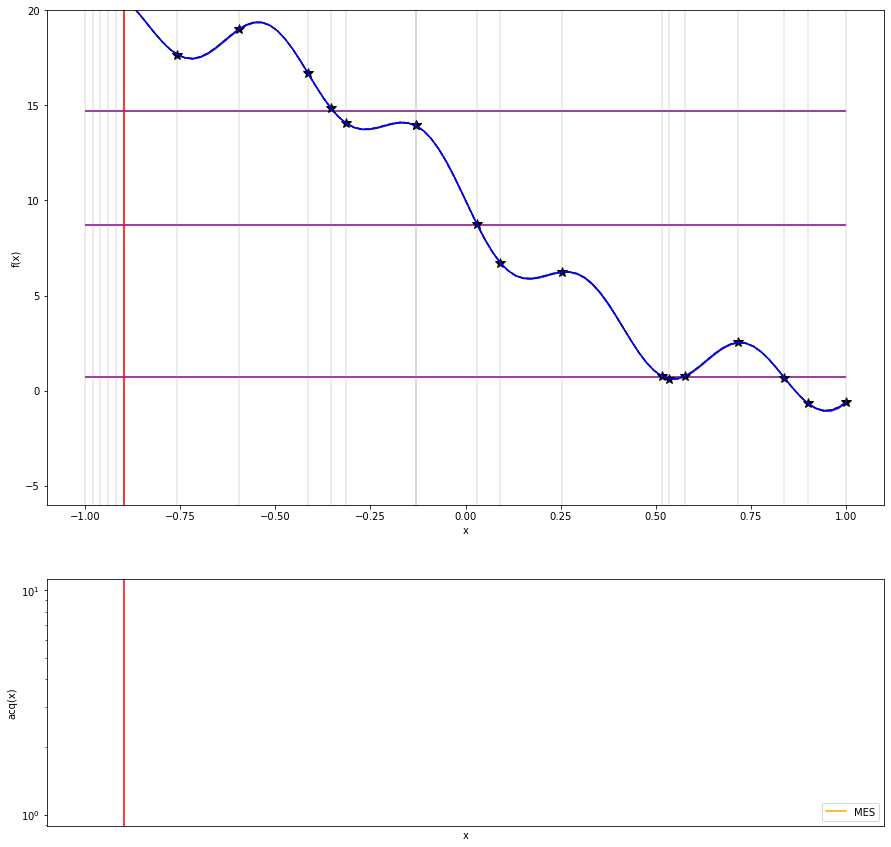

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig_ax2.set_yscale("

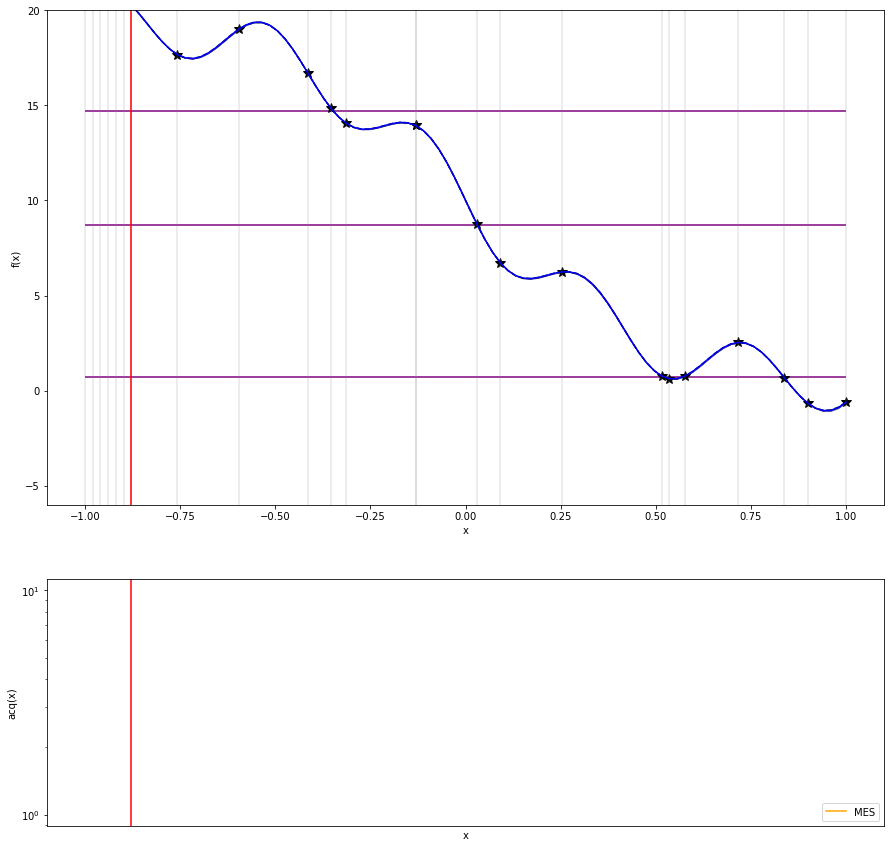

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(
C:\Users\EXCURS~1\AppData\Local\Temp/ipykernel_18152/2925070875.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig_ax2.set_yscale("

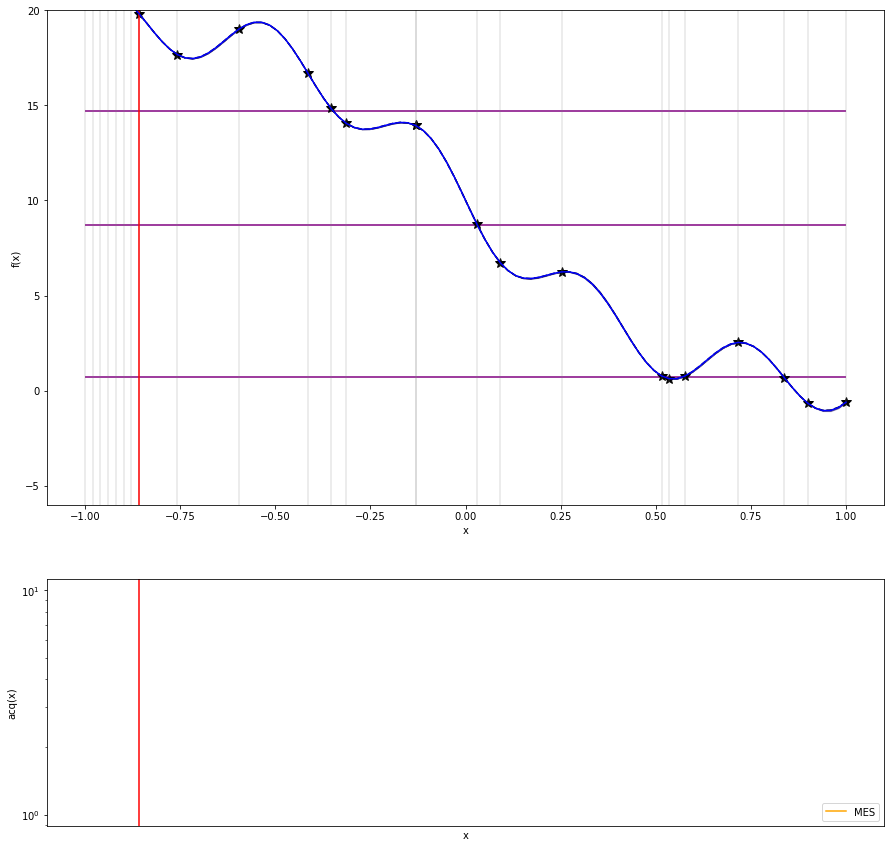

9.609375


In [7]:
learner_one = Learner(testcase_1D)
learner_one.initialize()

start = time.process_time()

for iteration in range(25):
    x_one = learner_one.suggest()
    result = learner_one.evaluate_and_tell(x_one)
    model = result.gp
    X_train = model.train_inputs[0].cpu().detach().numpy()
    y_train = model.train_targets.cpu().detach().numpy()
    plot_X = torch.from_numpy(result.plot_X).to(device=torch.device('cuda'), dtype=torch.float64)
    likelihood = result.gp.likelihood
    likelihood.eval()
    model.eval()
    prediction = likelihood(model(plot_X))
    variance = prediction.variance.cpu().detach().numpy()
    mean = prediction.mean.cpu().detach().numpy()
    true_y = result.func(plot_X).cpu().detach().numpy()
    acq = result.aqc
    if acq is not None:
        acq = result.aqc.cpu().detach().numpy()
    next_x = result.next_x
    if next_x is not None:
        next_x = next_x.cpu().detach().numpy()
    plot_test(acq, None, y_train, X_train, learner_one.details.plot_G, mean, variance, [0.7, 8.7, 14.7], next_x, true_y)

end = time.process_time() - start
print(end)


In [8]:
learner_one.details.plot_G

array([[-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
        -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
        -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
        -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
        -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
        -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
        -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
        -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
        -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
        -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
         0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
         0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
         0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
         0.31313131,  0.33333333,  0.35353535,  0.3

# plot_test(result.aqc, None, y_train, X_train, torch.from_numpy(result.plot_X), mean, variance, [0.7], result.next_x.cpu(), result.func)

plot_test(result.aqc.cpu().detach(), None, y_train, X_train, learner_one.details.plot_G[0].T, mean, variance, [0.7], result.next_x.cpu(), true_y)